# 数值逼近
## 样条插值
某电学元件的电压数据记录在0~2.25πA范围与电 流关系满足正弦函数，分别用线性插值和样条插值方法给 出经过数据点的数值逼近函数曲线。

In [12]:
import numpy as np
from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import optimize

In [13]:
# 在指定的间隔内返回均匀间隔的数字。
# 返回num均匀分布的样本，在[start, stop]。
# 这个区间的端点可以任意的被排除在外。
x = np.linspace(0, 2 * np.pi + np.pi / 4, 10)
y = np.sin(x)

x_new = np.linspace(0, 2 * np.pi + np.pi / 4, 100)
f_linear = interpolate.interp1d(x, y)
tck = interpolate.splrep(x, y)
y_bspline = interpolate.splev(x_new, tck)

/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20239 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0, 

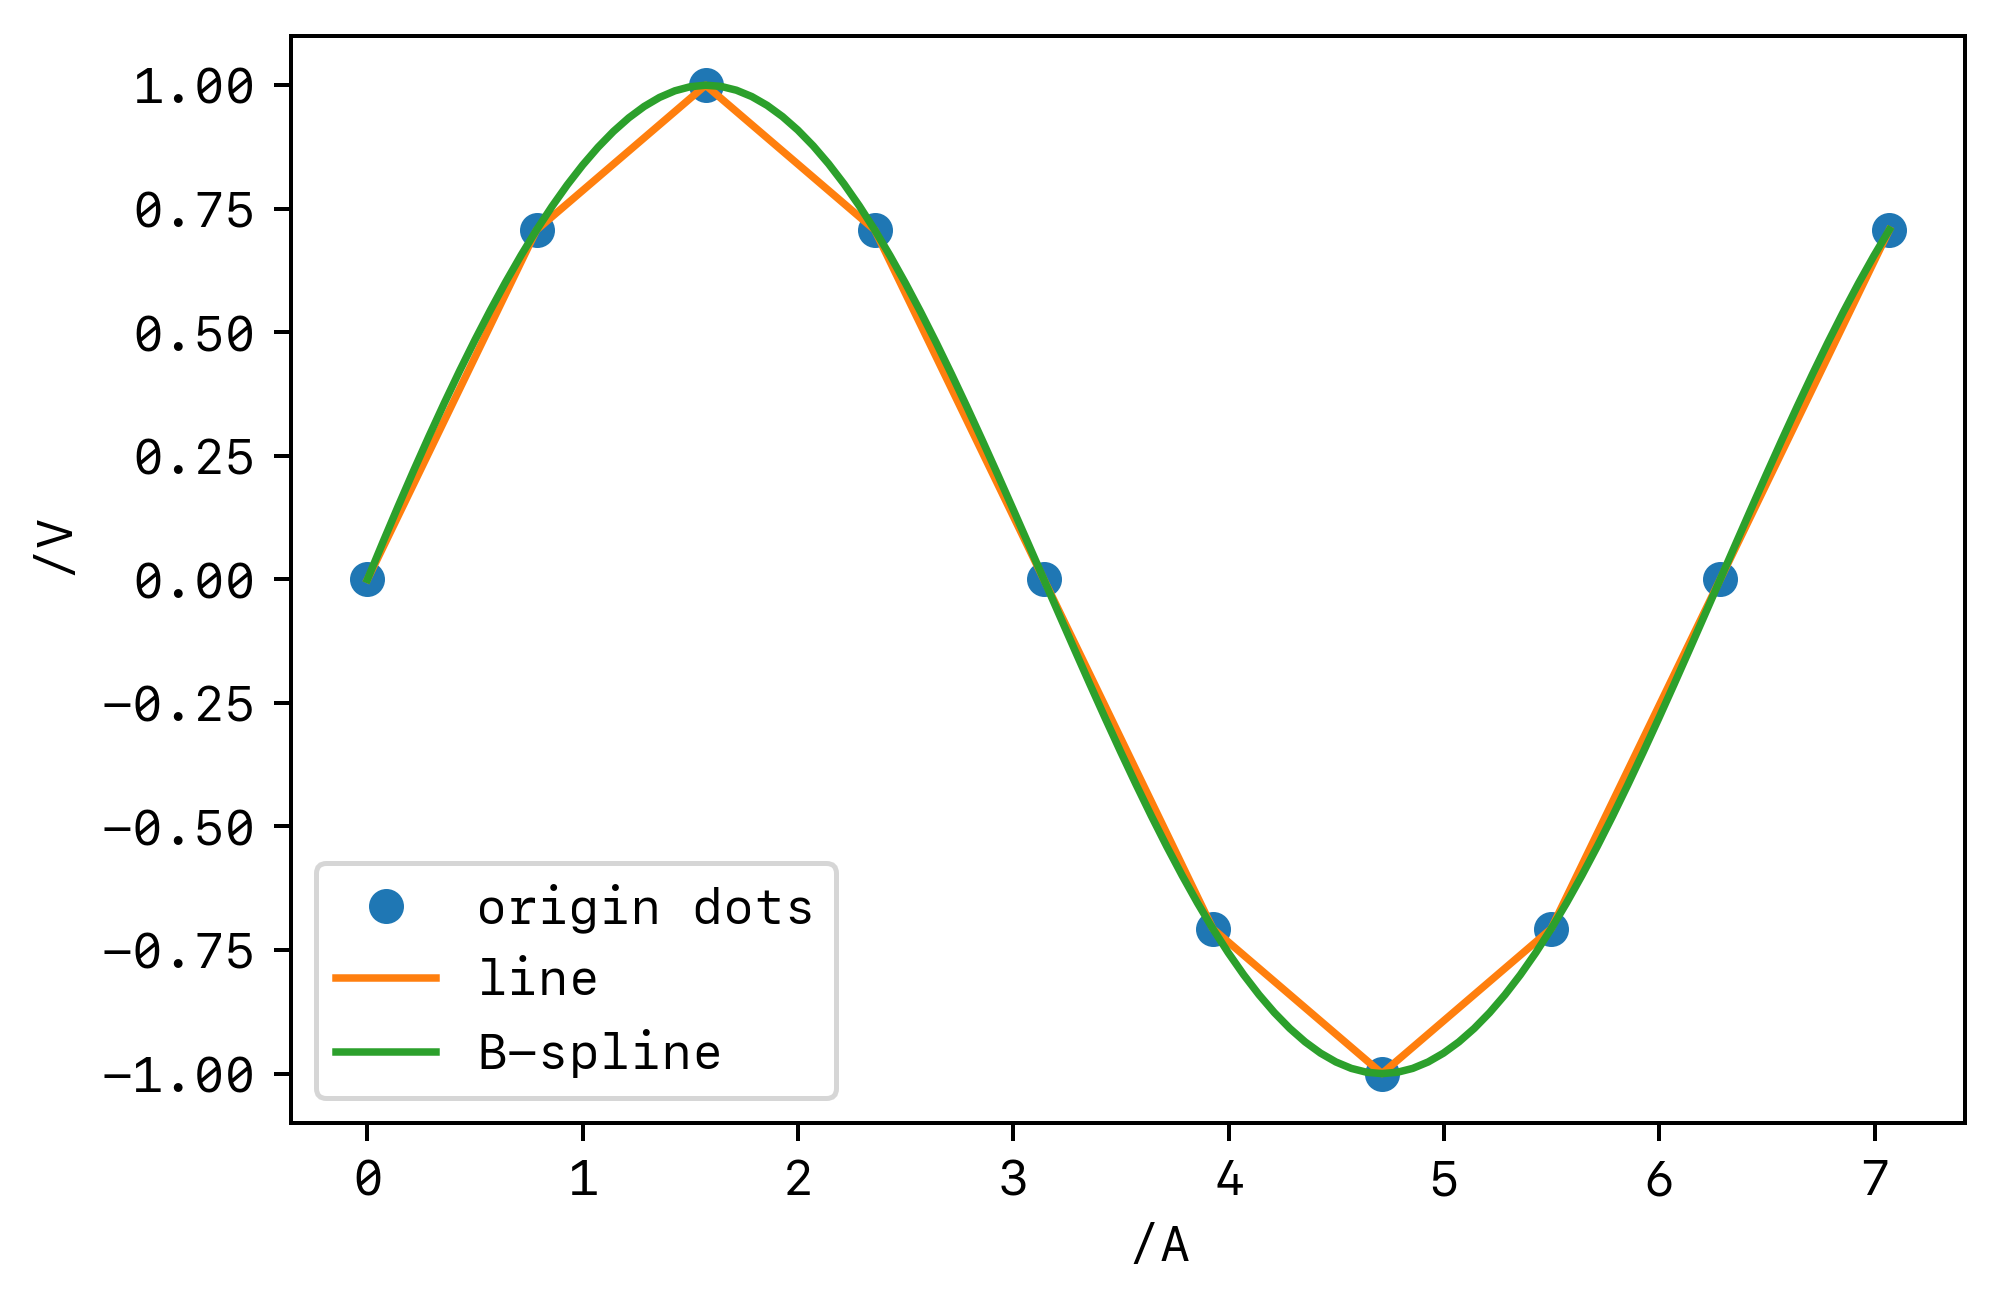

In [14]:
plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率

plt.xlabel(u'安培/A')
plt.ylabel(u'伏特/V')
plt.plot(x, y, "o", label=u"origin dots")
plt.plot(x_new, f_linear(x_new), label=u"line")
plt.plot(x_new, y_bspline, label=u"B-spline")
plt.legend()
plt.show()


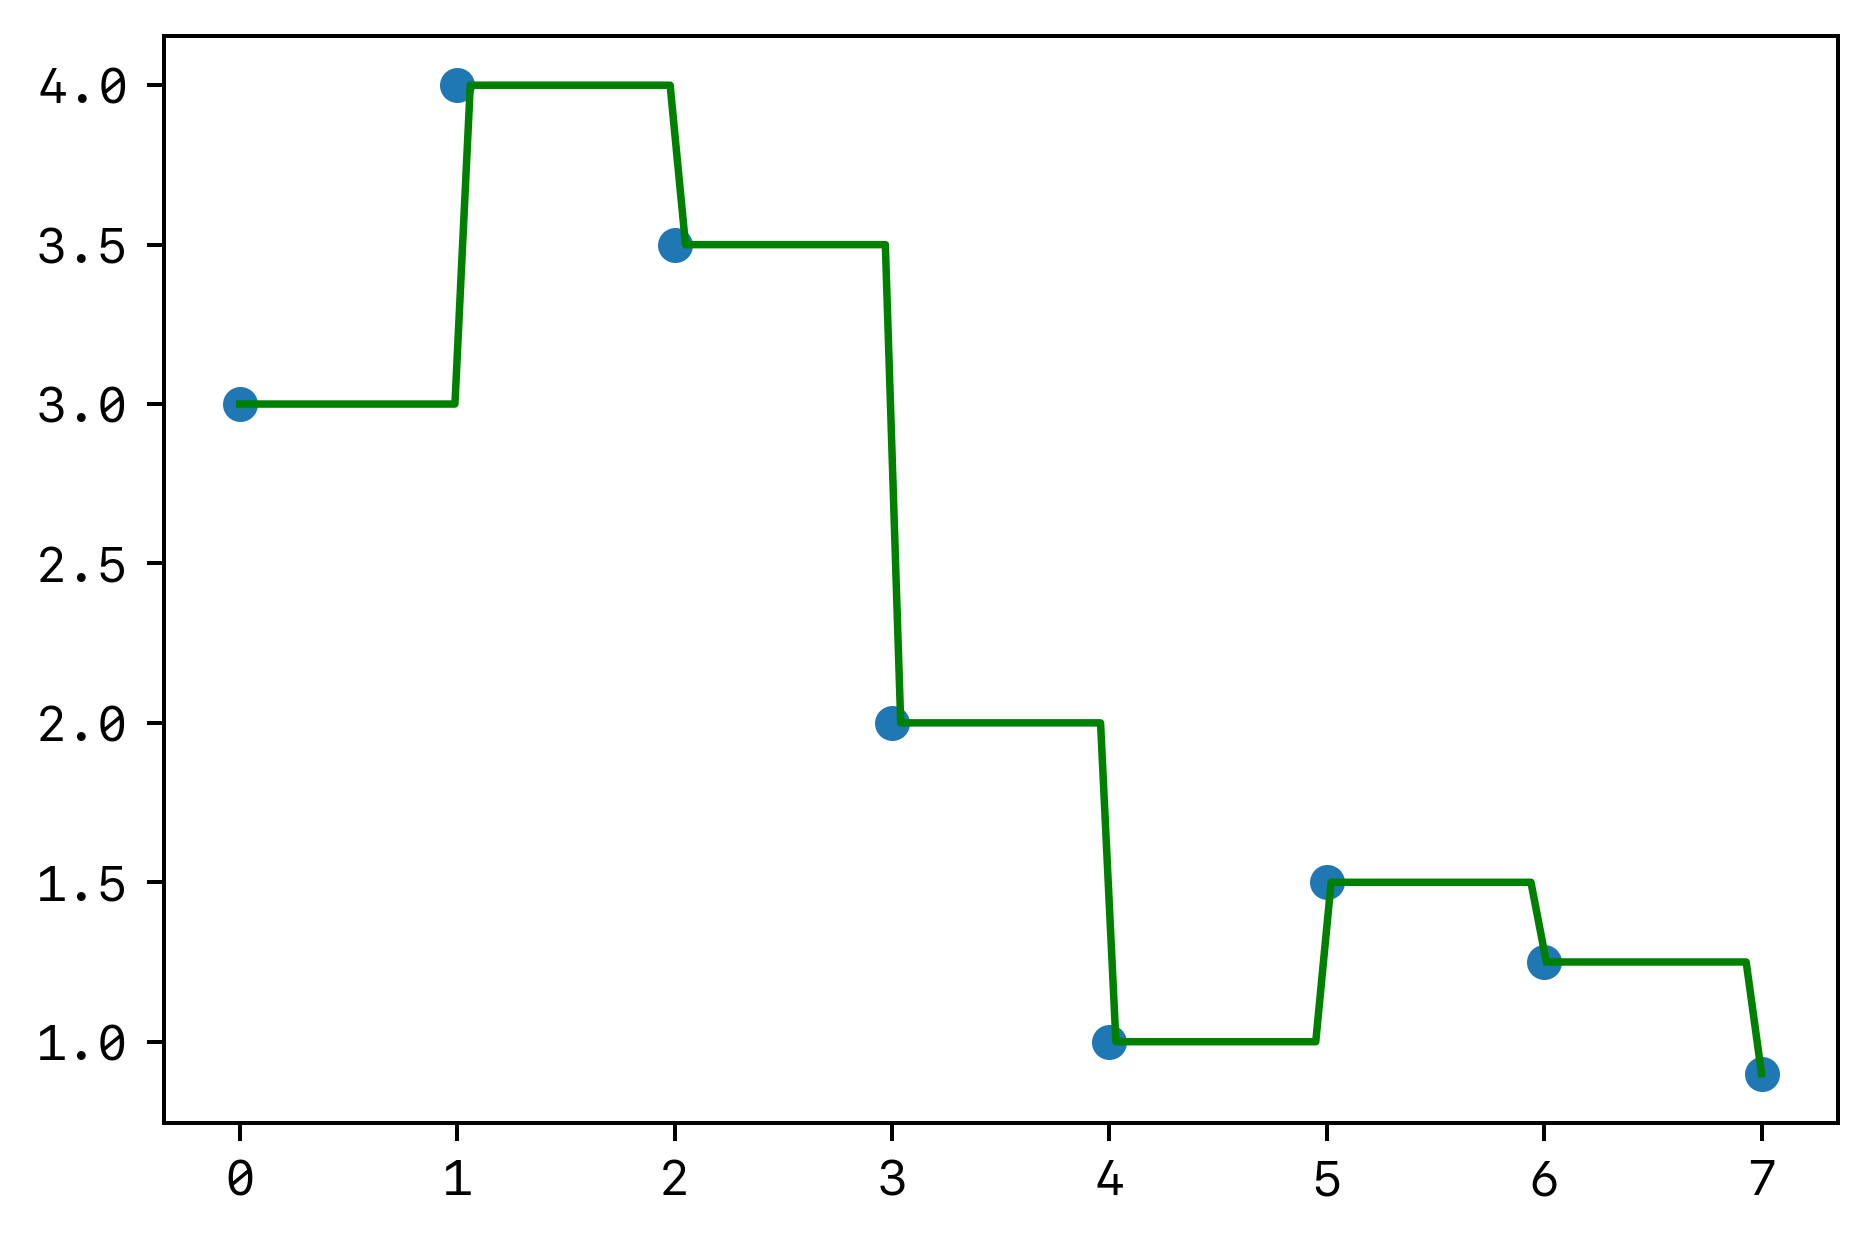

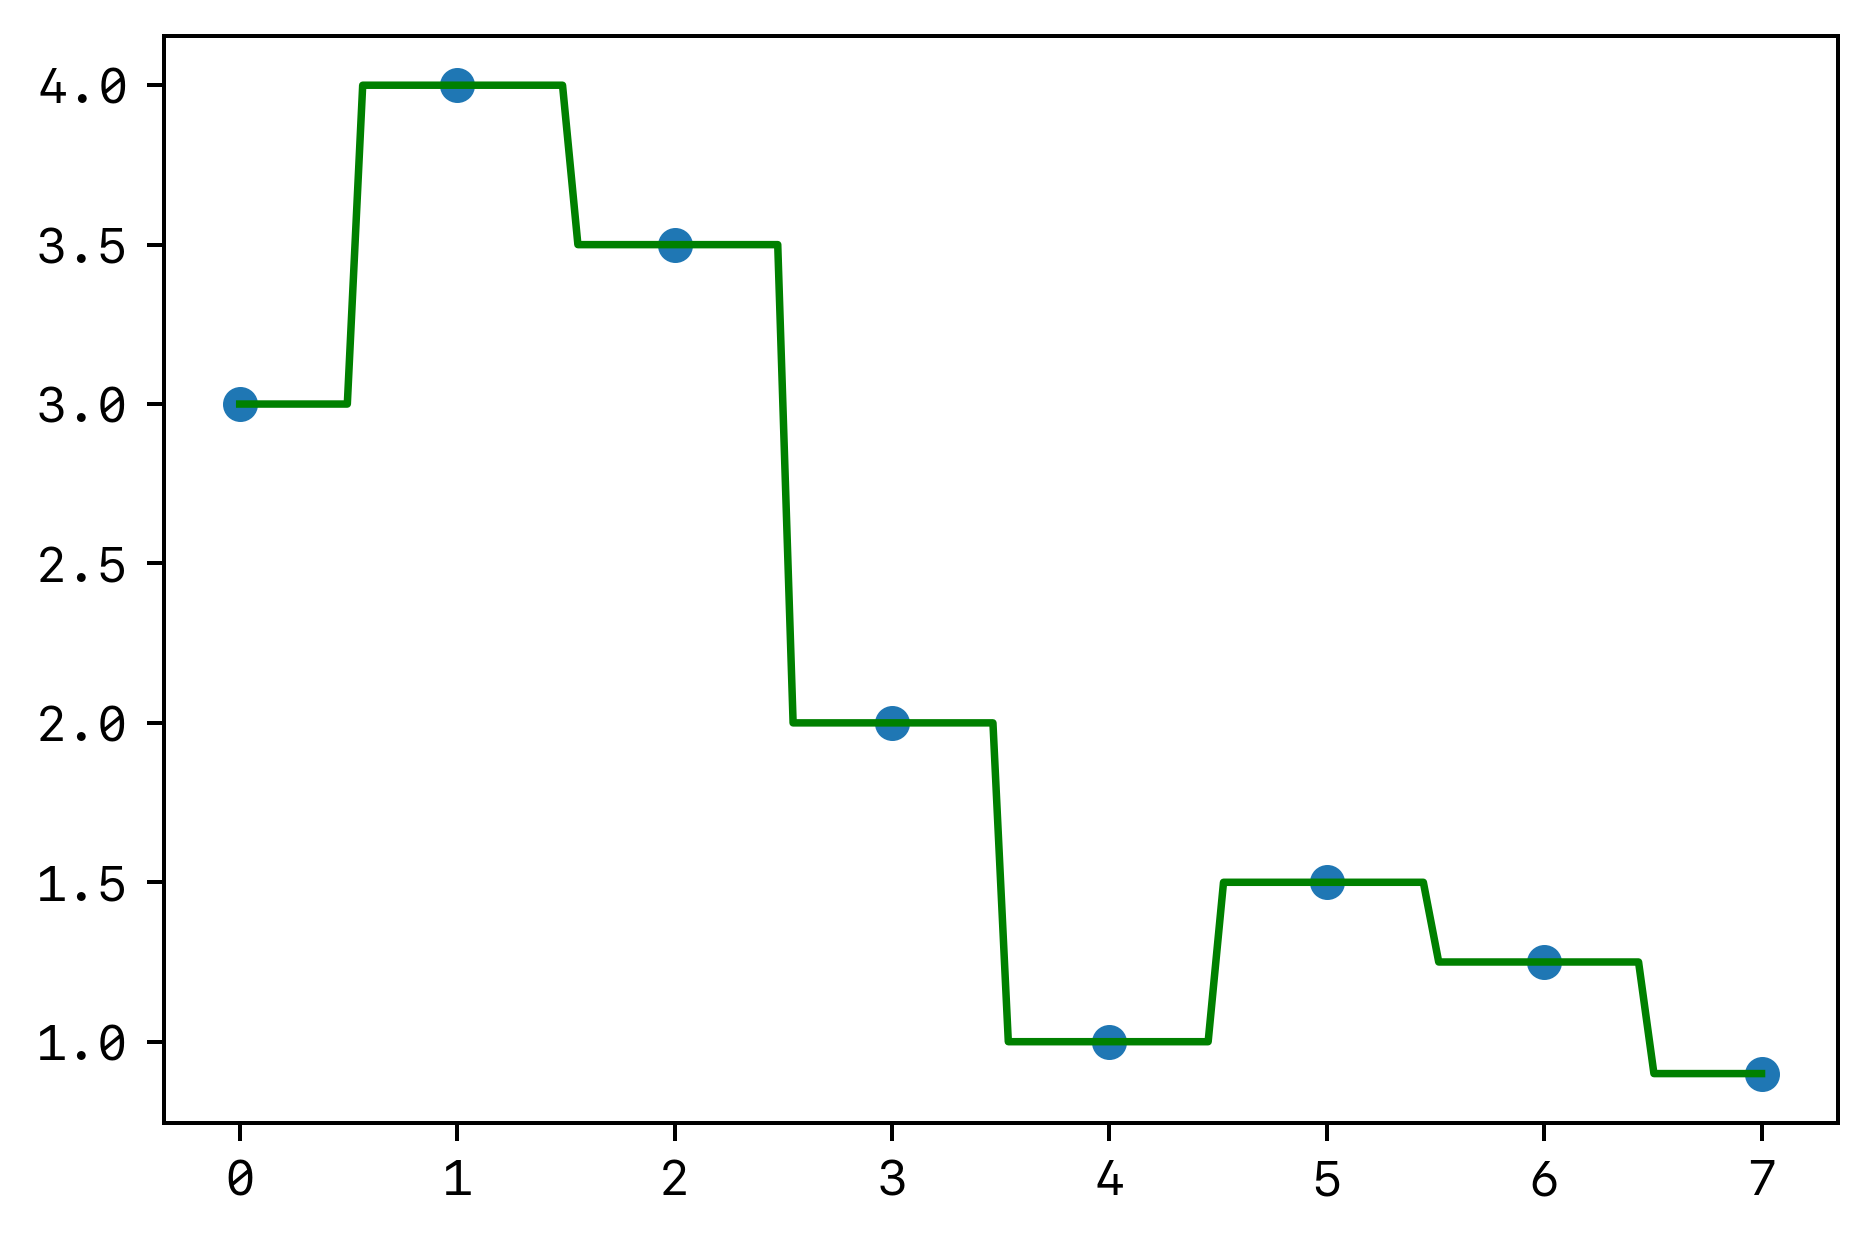

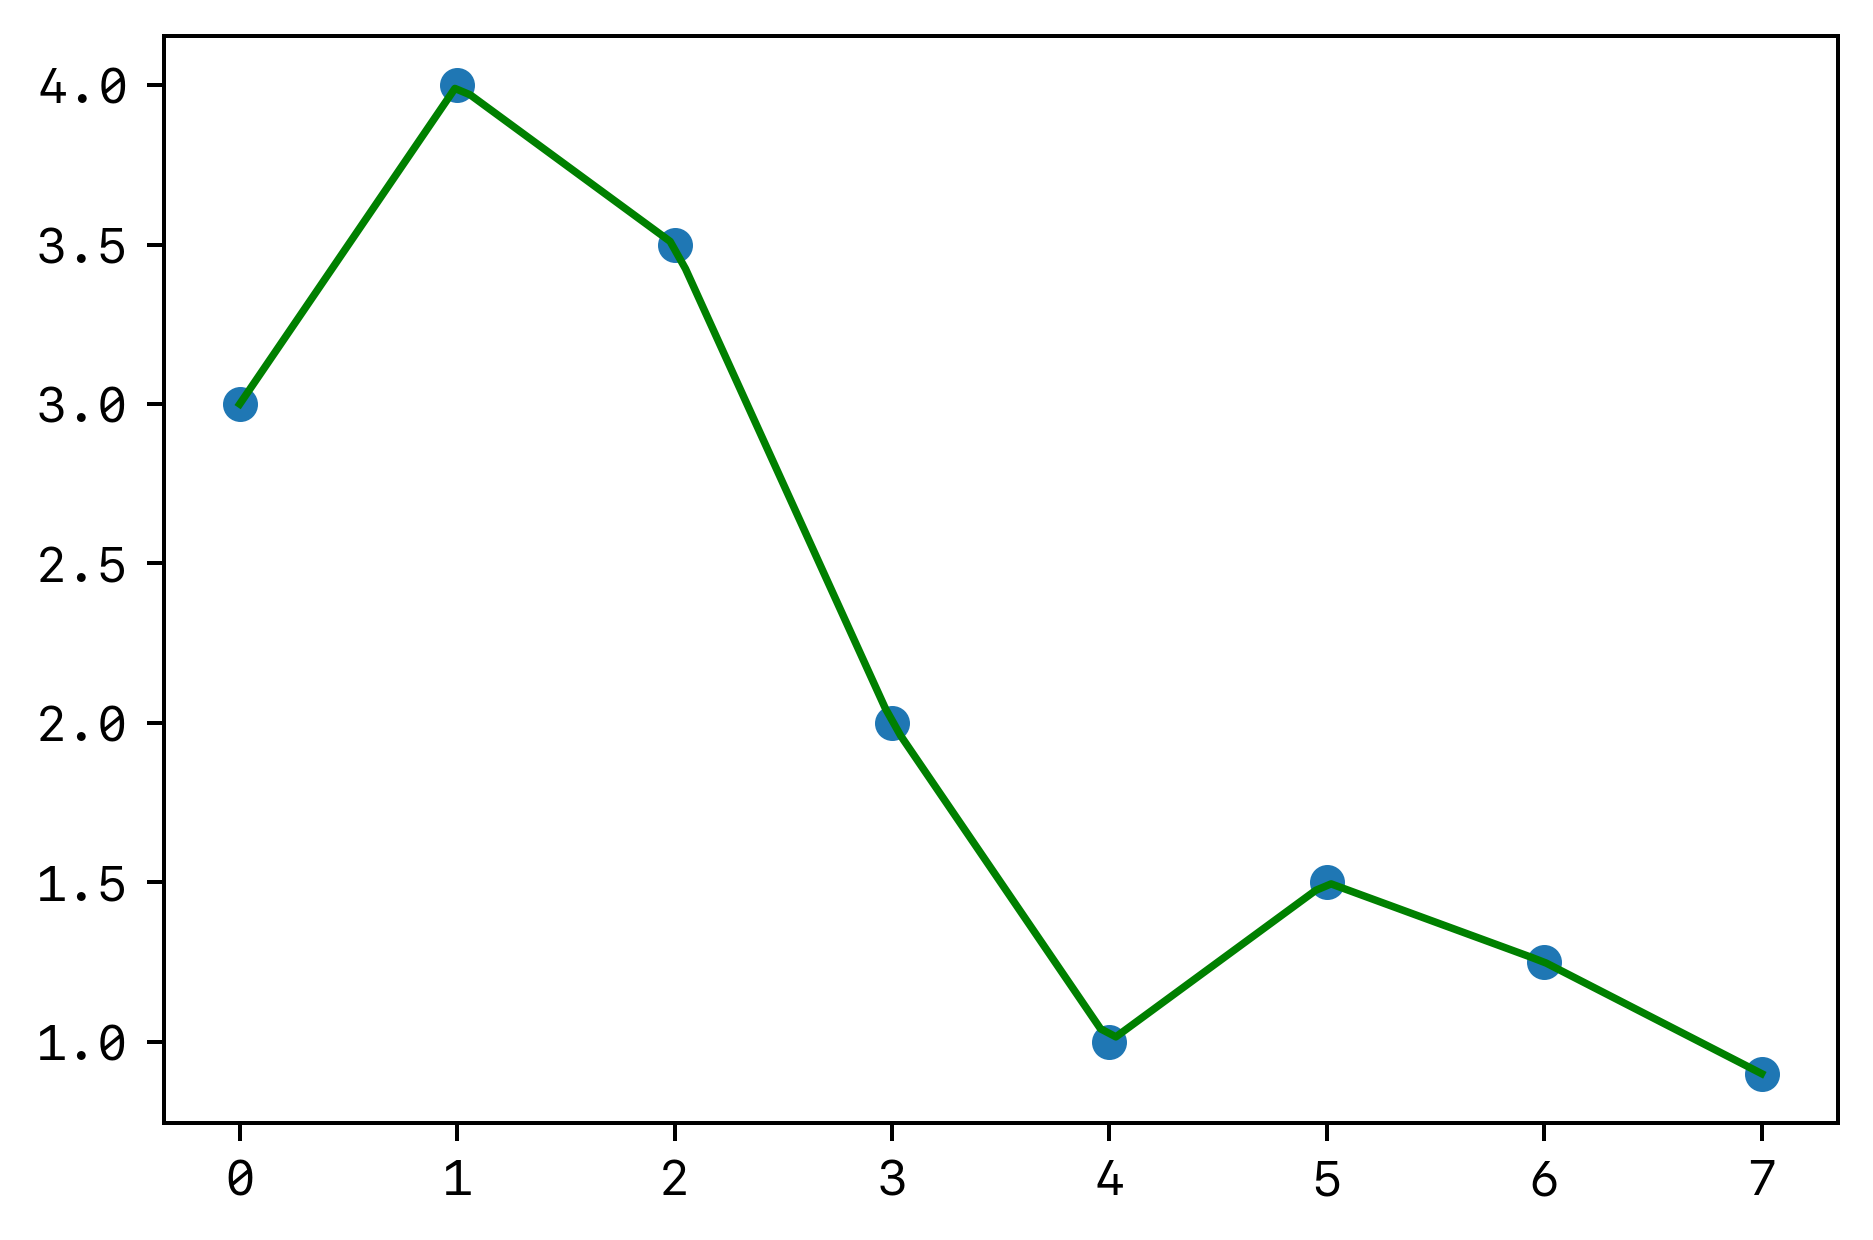

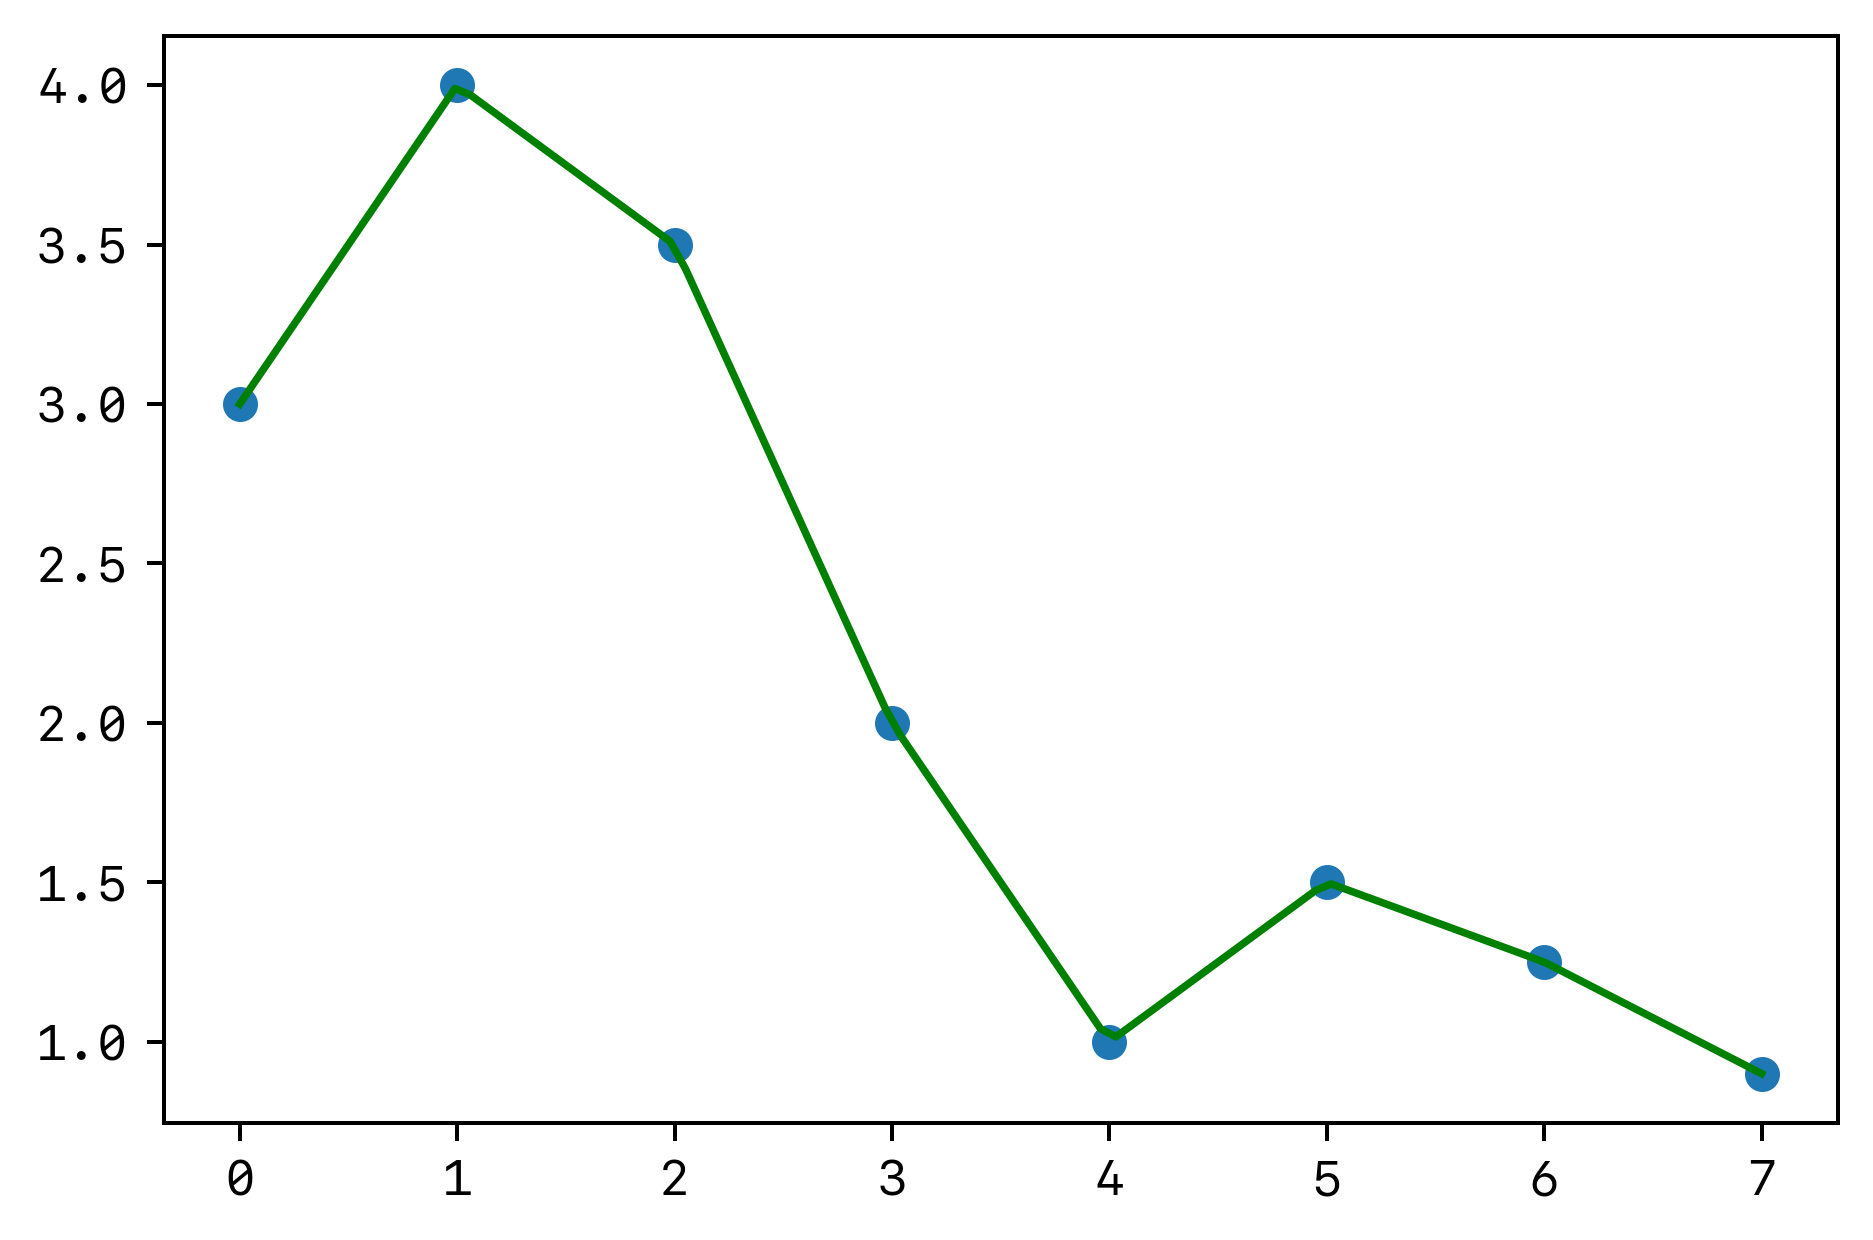

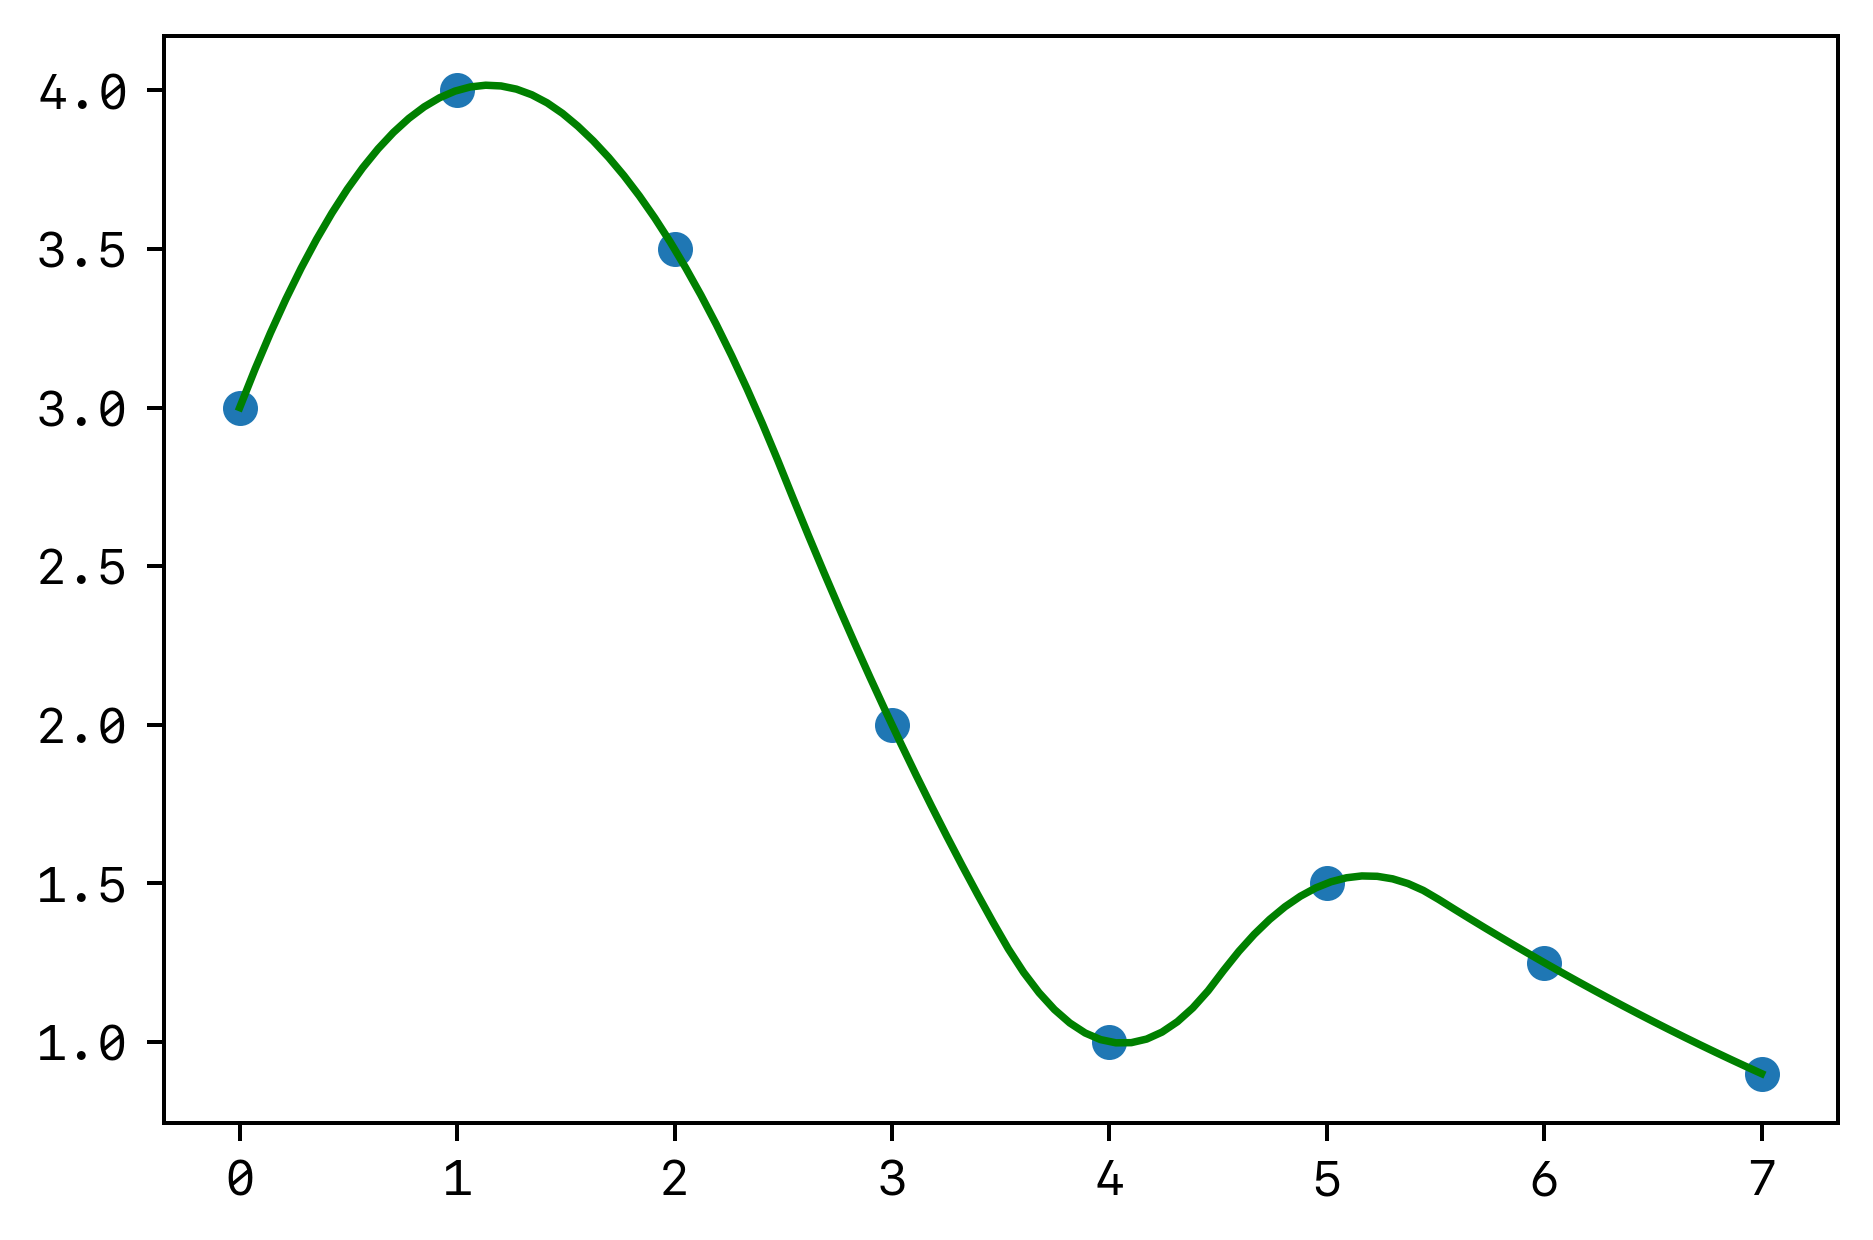

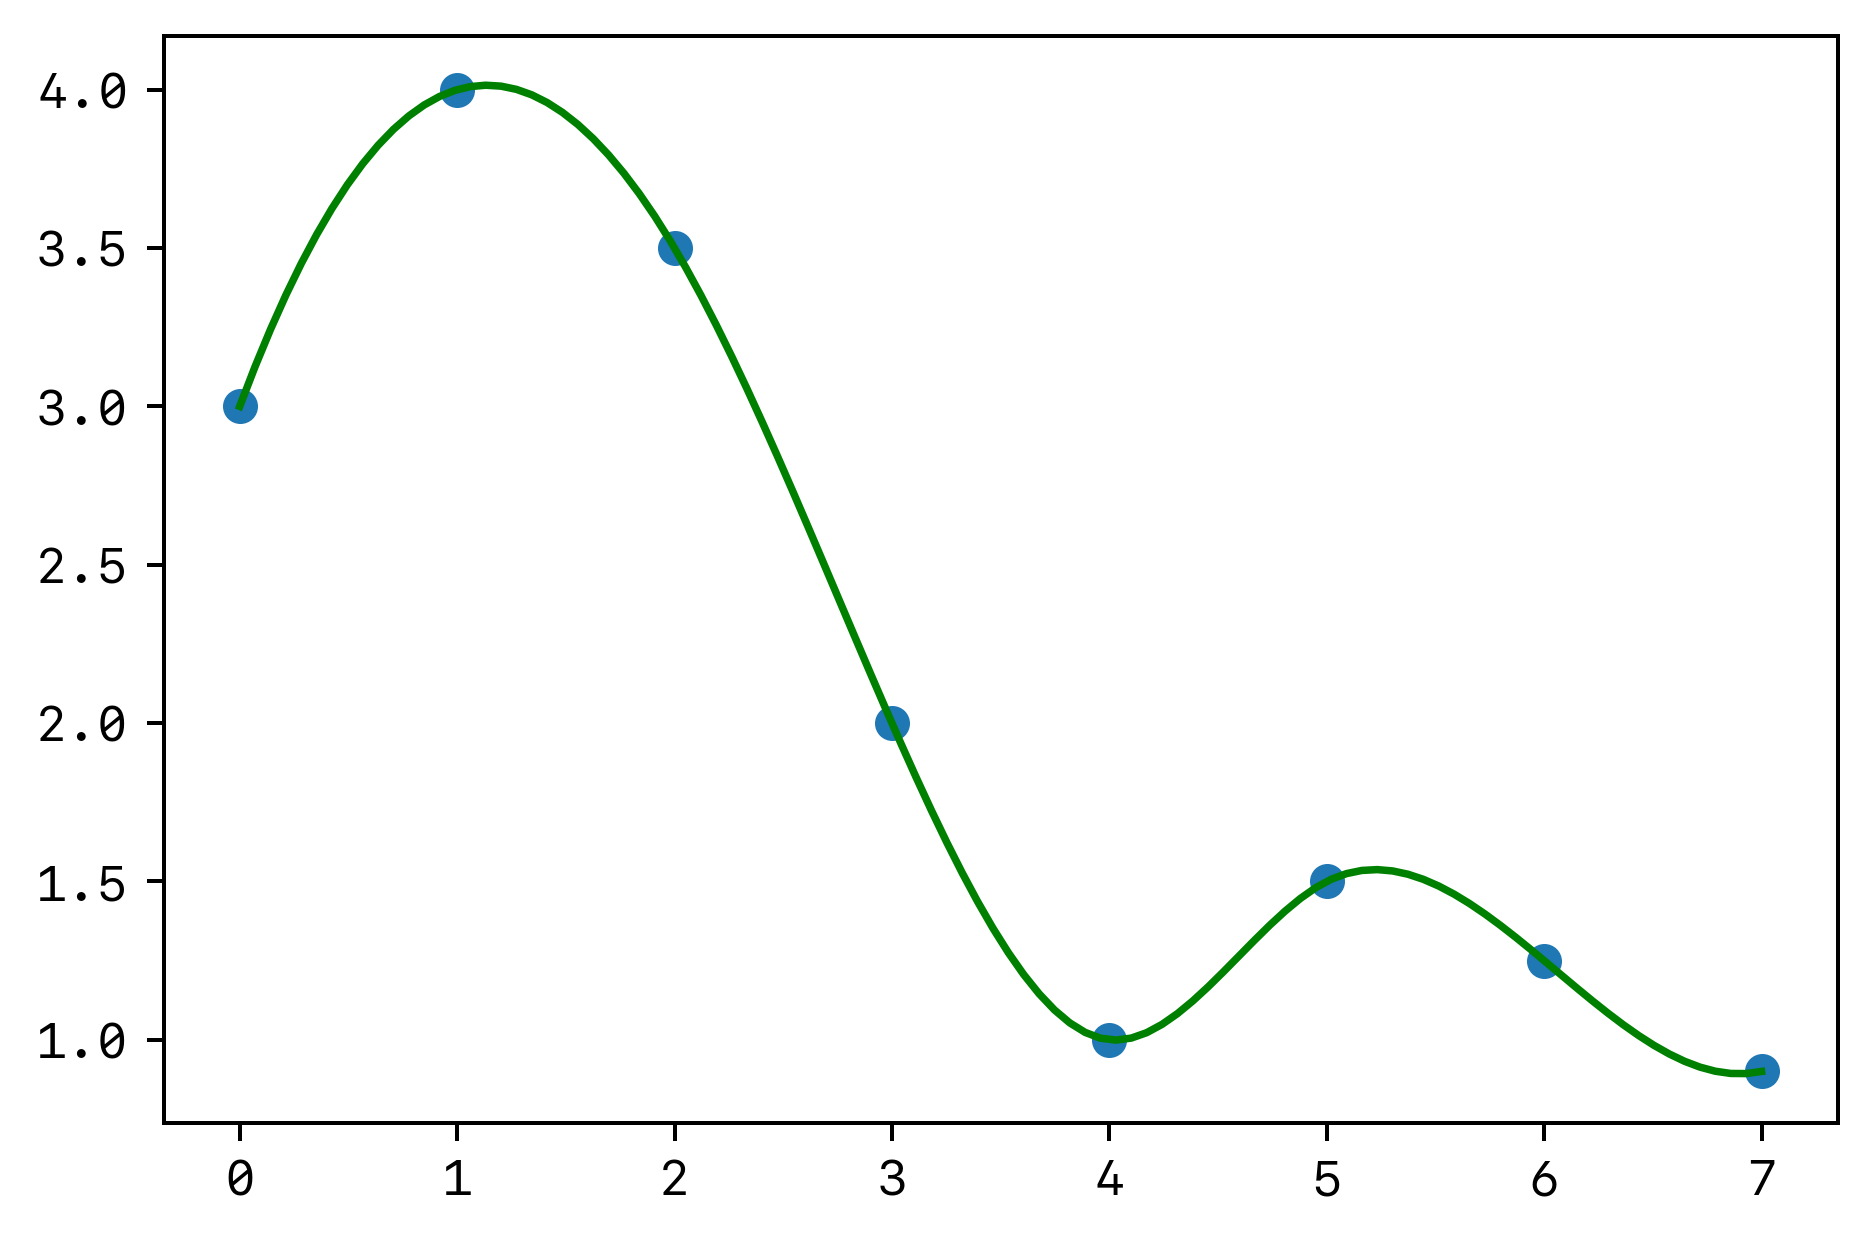

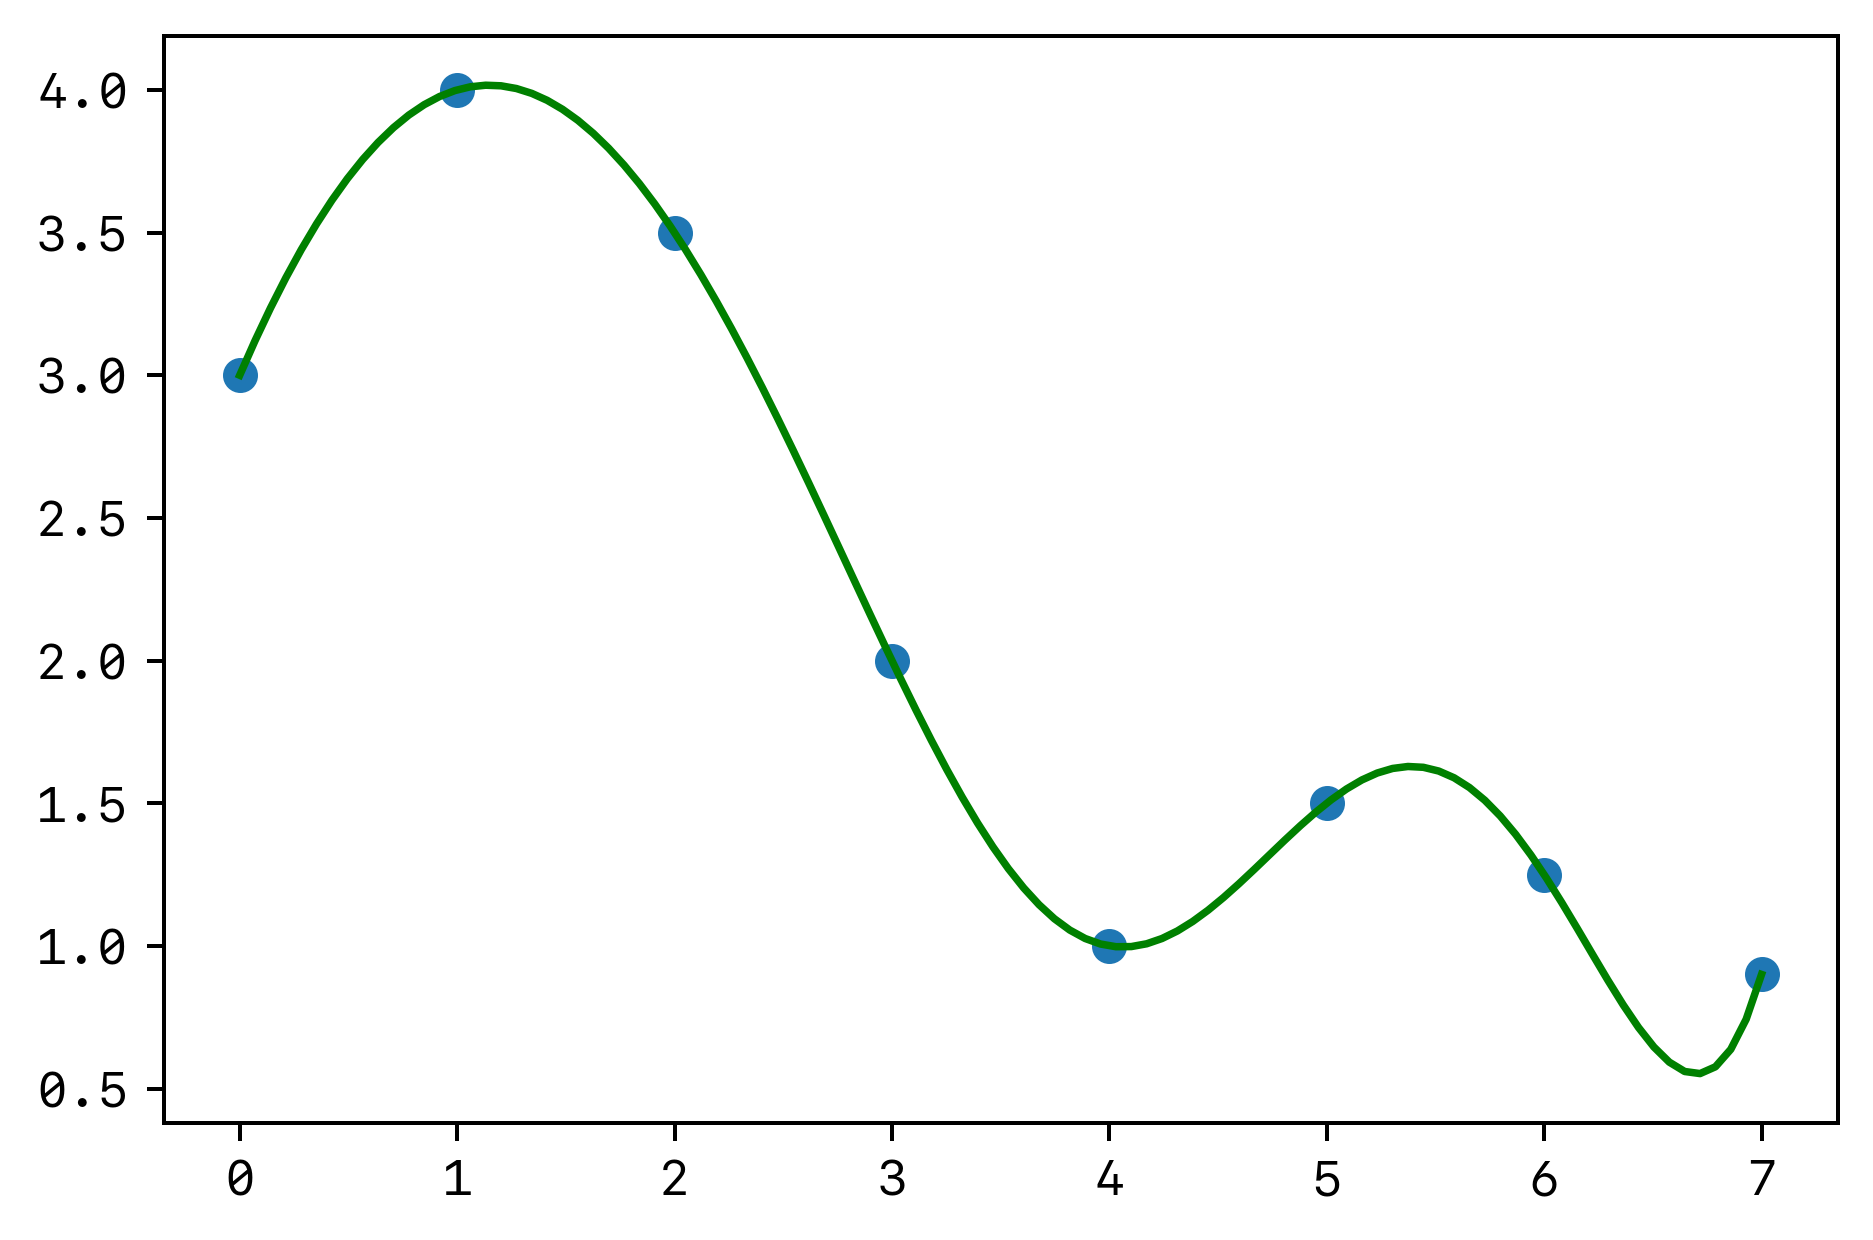

In [15]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])  #离散点的分布
xx = np.linspace(x.min(), x.max(), 100)  #新的插值区间及其点的个数

for n in ['zero', 'nearest', 'slinear', 'linear', 'quadratic', "cubic", 5]:  #python scipy里面的各种插值函数
    plt.title = str(n)
    plt.scatter(x, y)  #散点图  #编辑插值函数格式
    ynew = interpolate.interp1d(x, y, kind=n)(xx)  #通过相应的插值函数求得新的函数点
    plt.plot(xx, ynew, "g")  #输出新的函数点的图像
    plt.show()

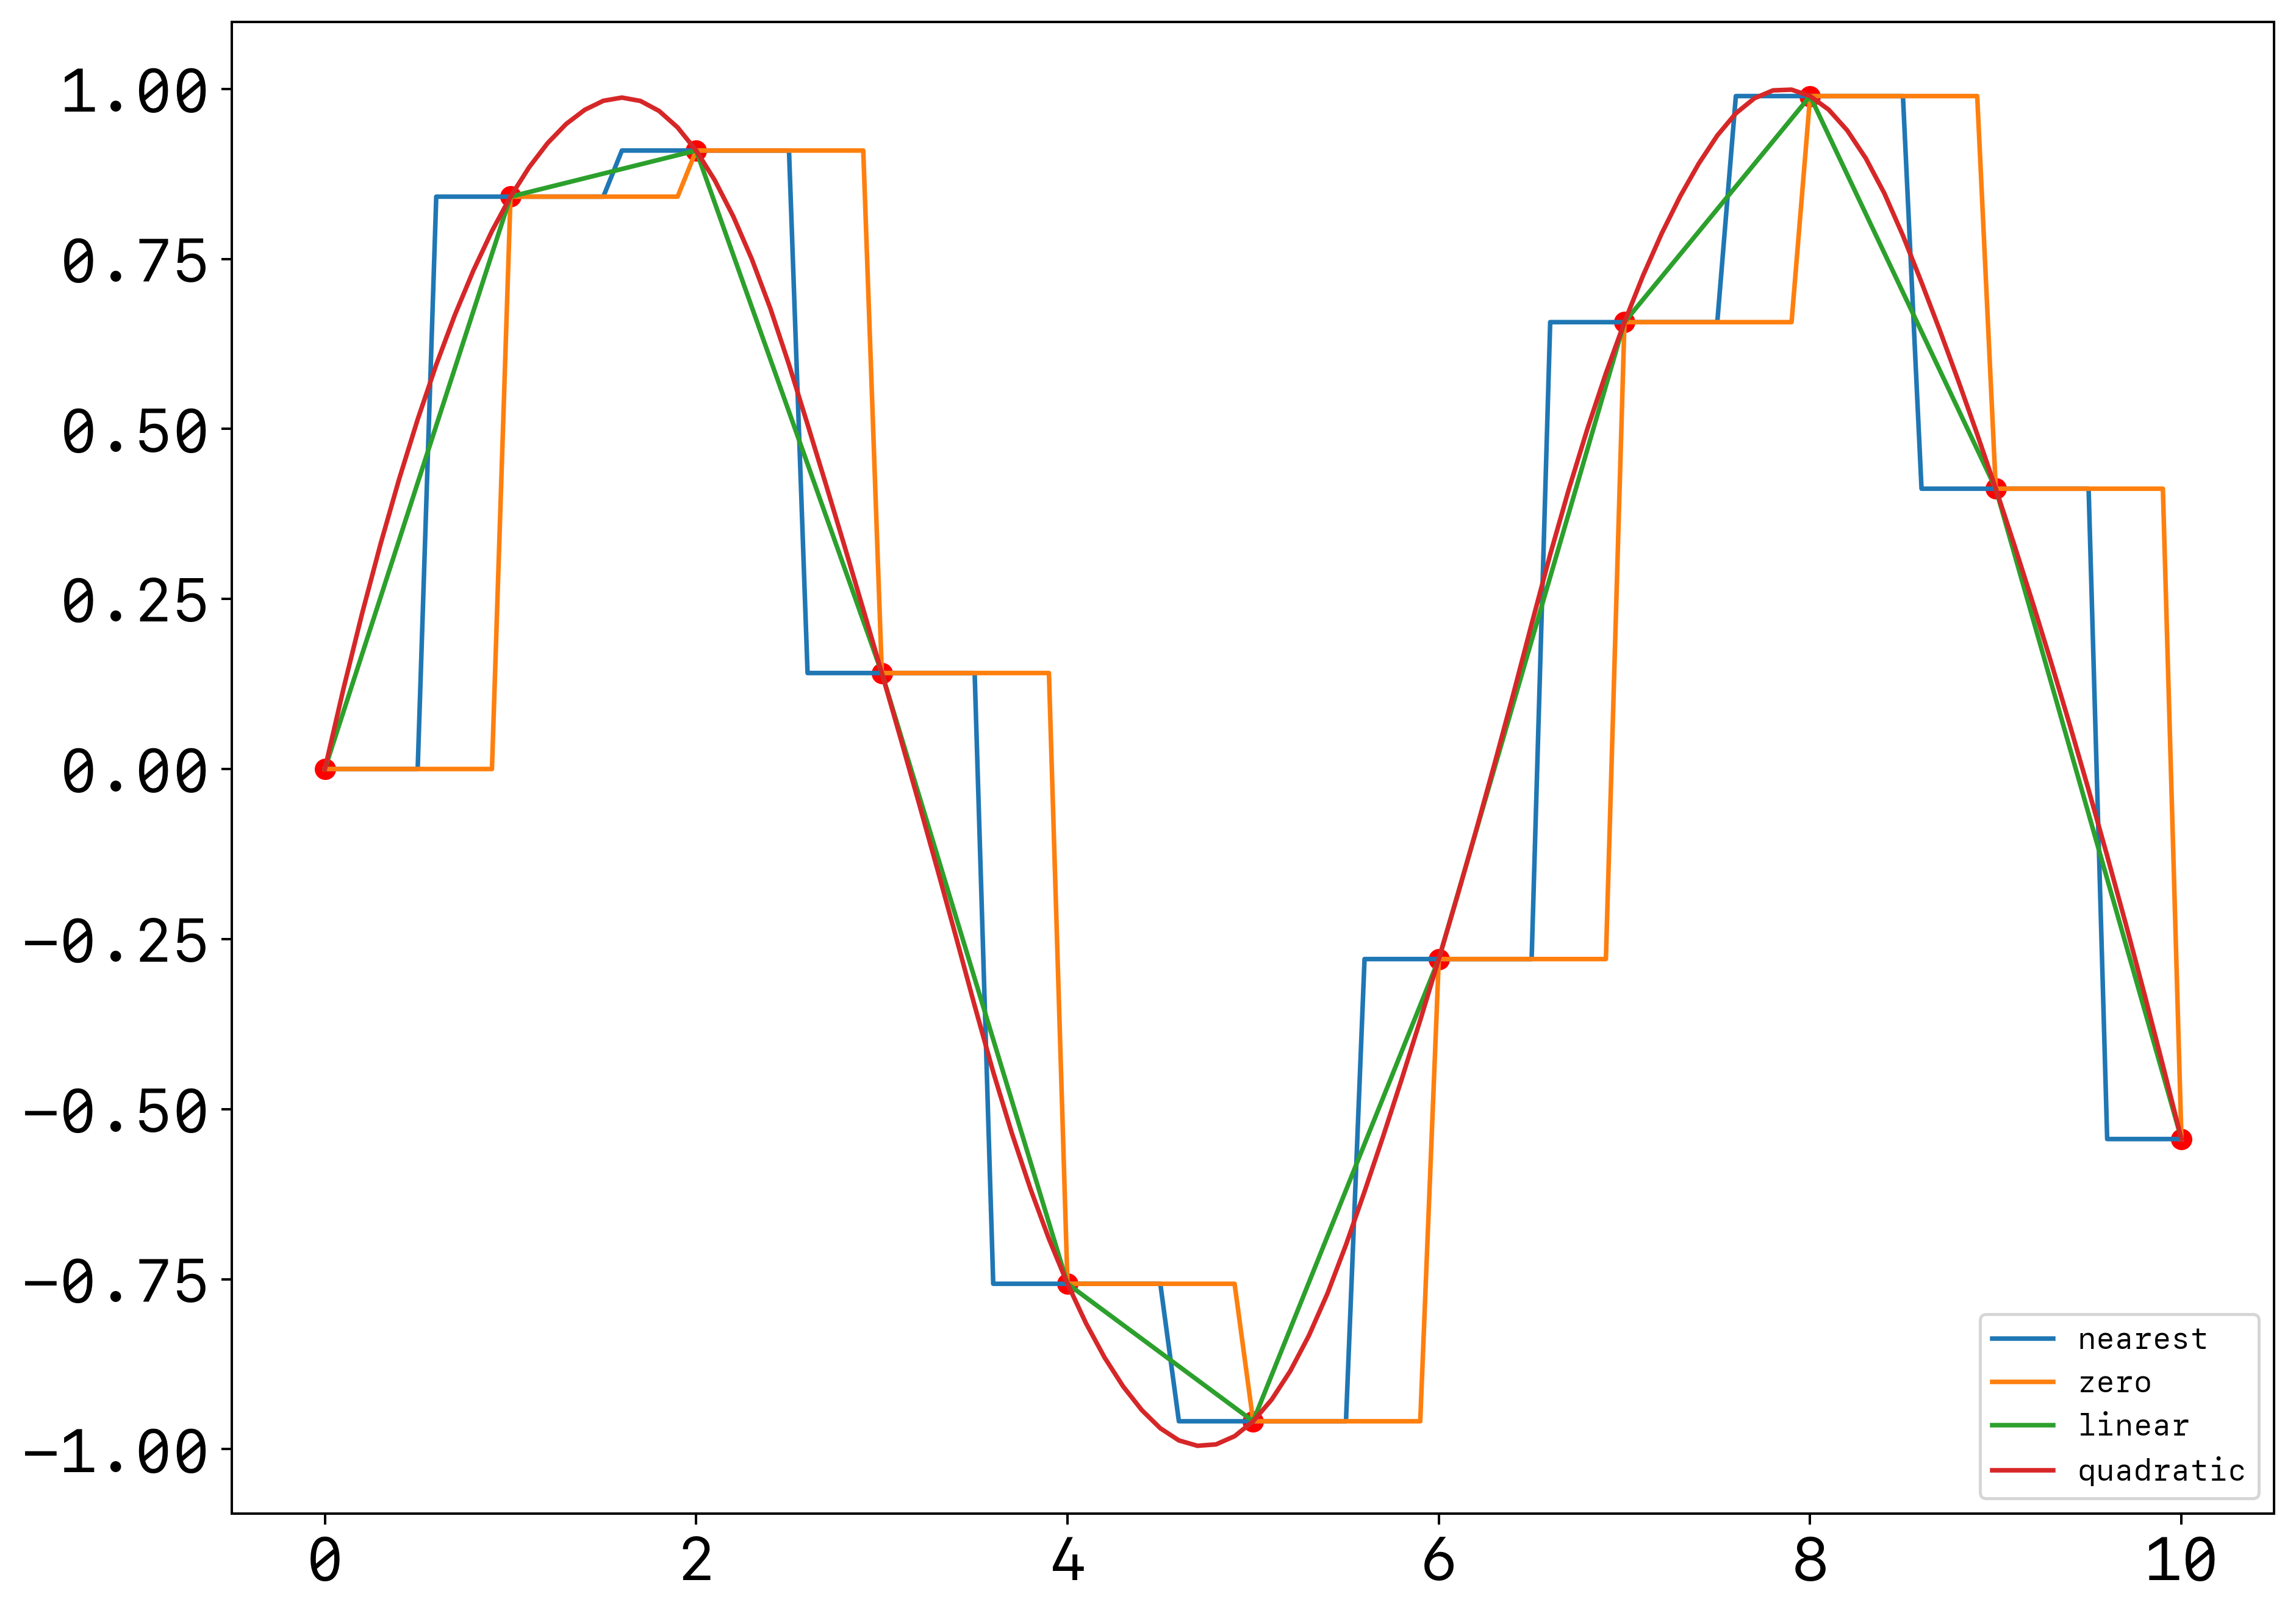

In [16]:
x = np.linspace(0, 10, 11)
y = np.sin(x)
plt.figure(figsize=(12, 9))
plt.plot(x, y, 'ro')
xnew = np.linspace(0, 10, 101)
for kind in ['nearest', 'zero', 'linear', 'quadratic']:
    f = interpolate.interp1d(x, y, kind=kind)
    ynew = f(xnew)
    plt.plot(xnew, ynew, label=str(kind))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='lower right')
plt.show()

插值点个数5-8左右都是比较危险的区域了，8之上最好换成拟合

## 样条插值

In [17]:
def func(x, y):
    return (x + y) * np.exp(-5.0 * (x ** 2 + y ** 2))


#X-Y轴分为15*15的网格
y, x = np.mgrid[-1:1:15j, -1:1:15j]
# np.mgrid返回多维结构，常见的如2D图形，3D图形
# np.mgrid[start:end:step]
# 第n个值返回值为第n维数据在最终结构中的分布
# nj：n个点，步长为复数表示点数，左闭右闭；步长为实数表示间隔，左闭右开
# 其中x沿着水平向右的方向扩展(即是：每列都相同)。y沿着垂直的向下的方向扩展(即是：每行都相同)。

In [18]:
#计算每个网格点上函数值
fvals = func(x, y)
#三次样条二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')
#计算100*100网格上插值
xnew = np.linspace(-1, 1, 100)
ynew = np.linspace(-1, 1, 100)

fnew = newfunc(xnew, ynew)

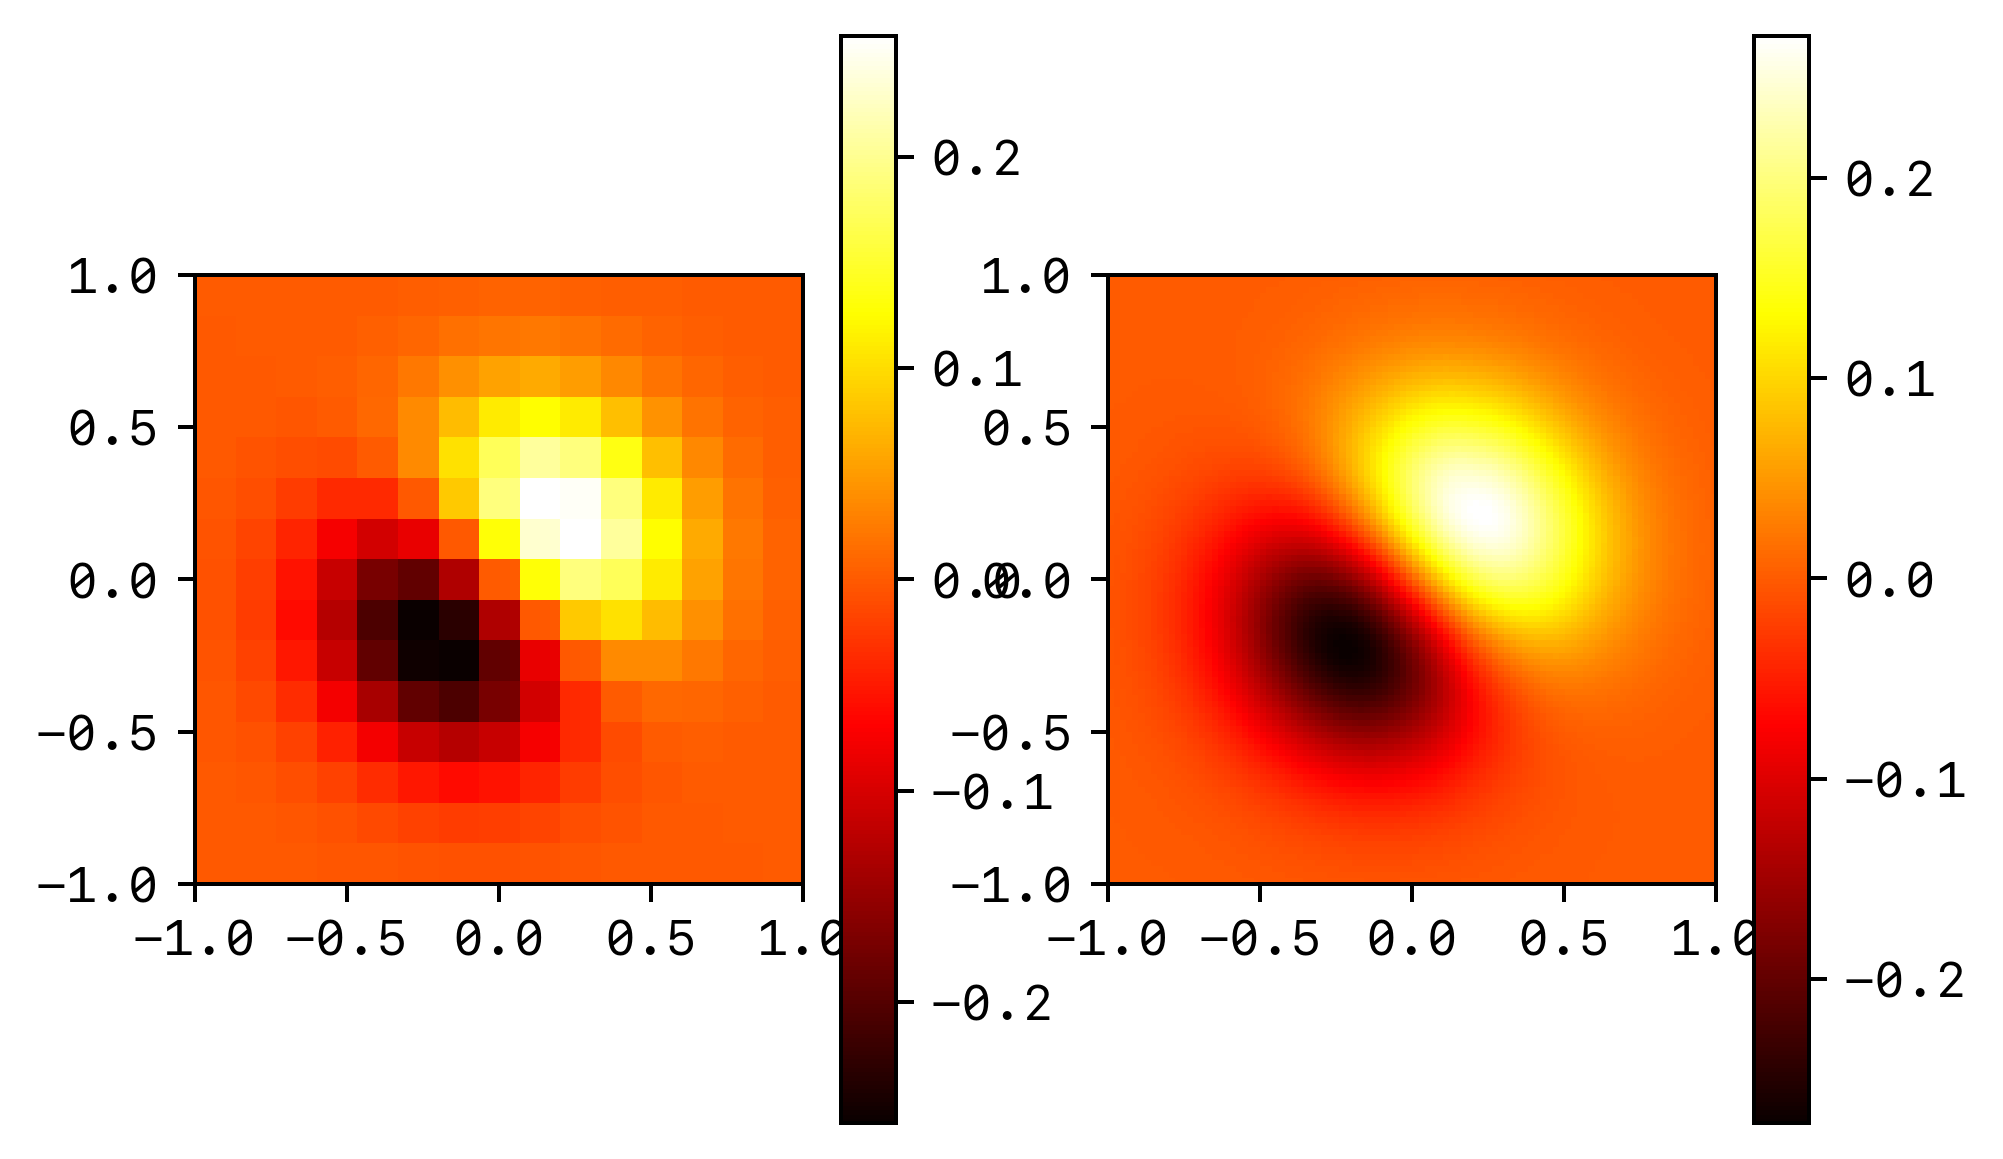

In [19]:
plt.subplot(121)
im1 = plt.imshow(fvals, extent=[-1, 1, -1, 1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
plt.colorbar(im1)
plt.subplot(122)

im2 = plt.imshow(fnew, extent=[-1, 1, -1, 1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
plt.colorbar(im2)
plt.show()

## 二维插值

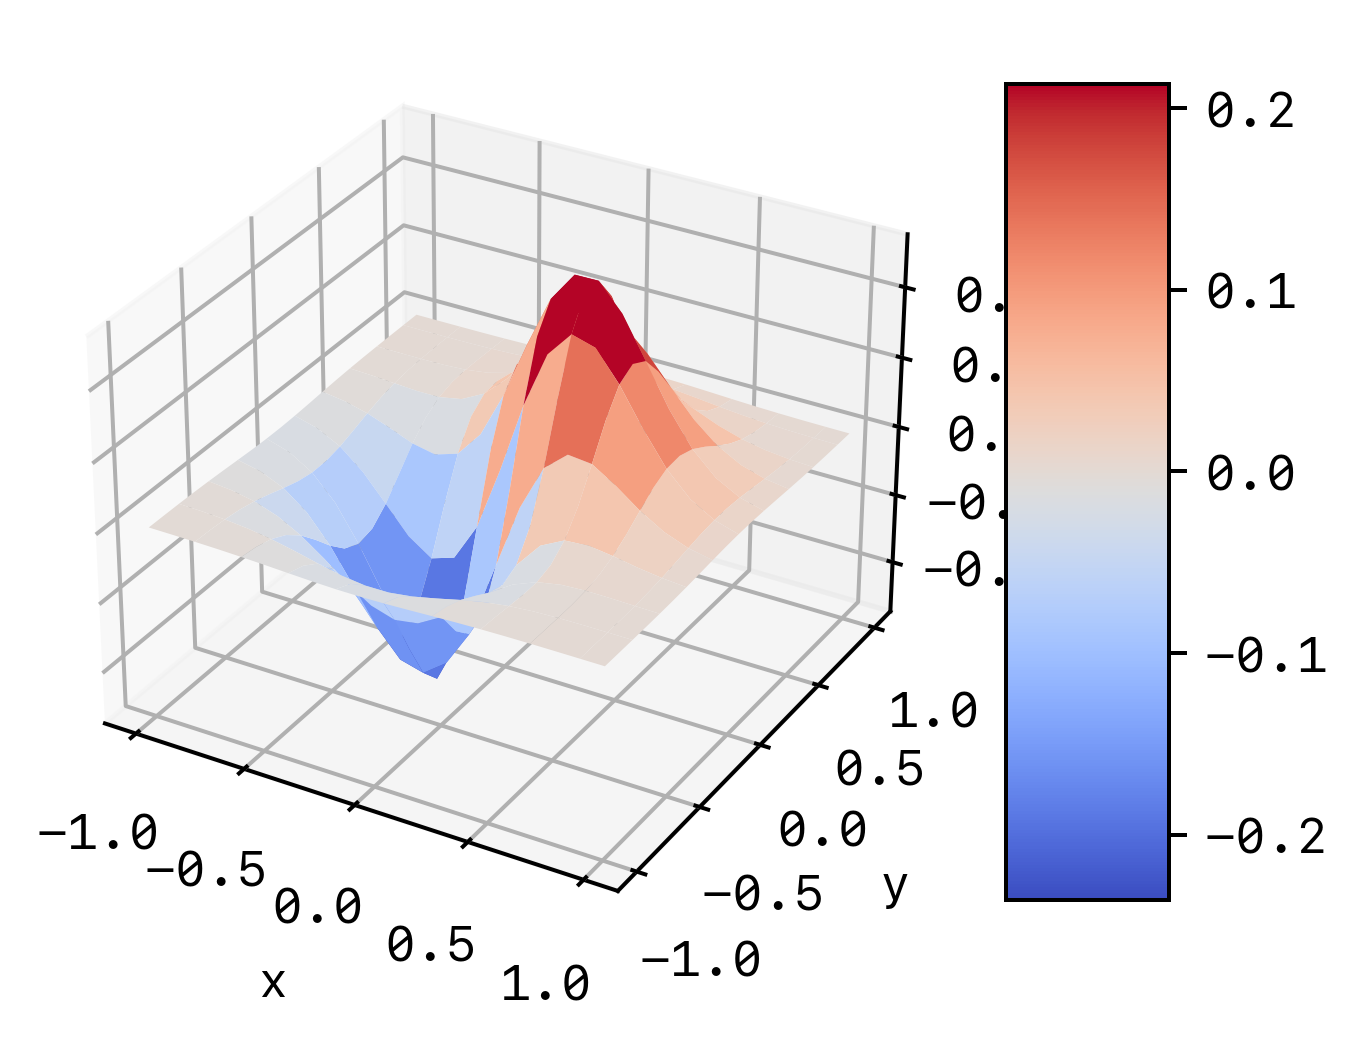

In [20]:
def func(x, y):
    return (x + y) * np.exp(-5.0 * (x ** 2 + y ** 2))


x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
x, y = np.meshgrid(x, y)  # 生成网格点坐标矩阵
fvals = func(x, y)
fig = plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 2, 1, projection='3d')
# rstride行跨度
# cstride列跨度
# antialised抗锯齿效果
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.colorbar(surf, shrink=0.5, aspect=5)  #添加颜色条标注
plt.show()

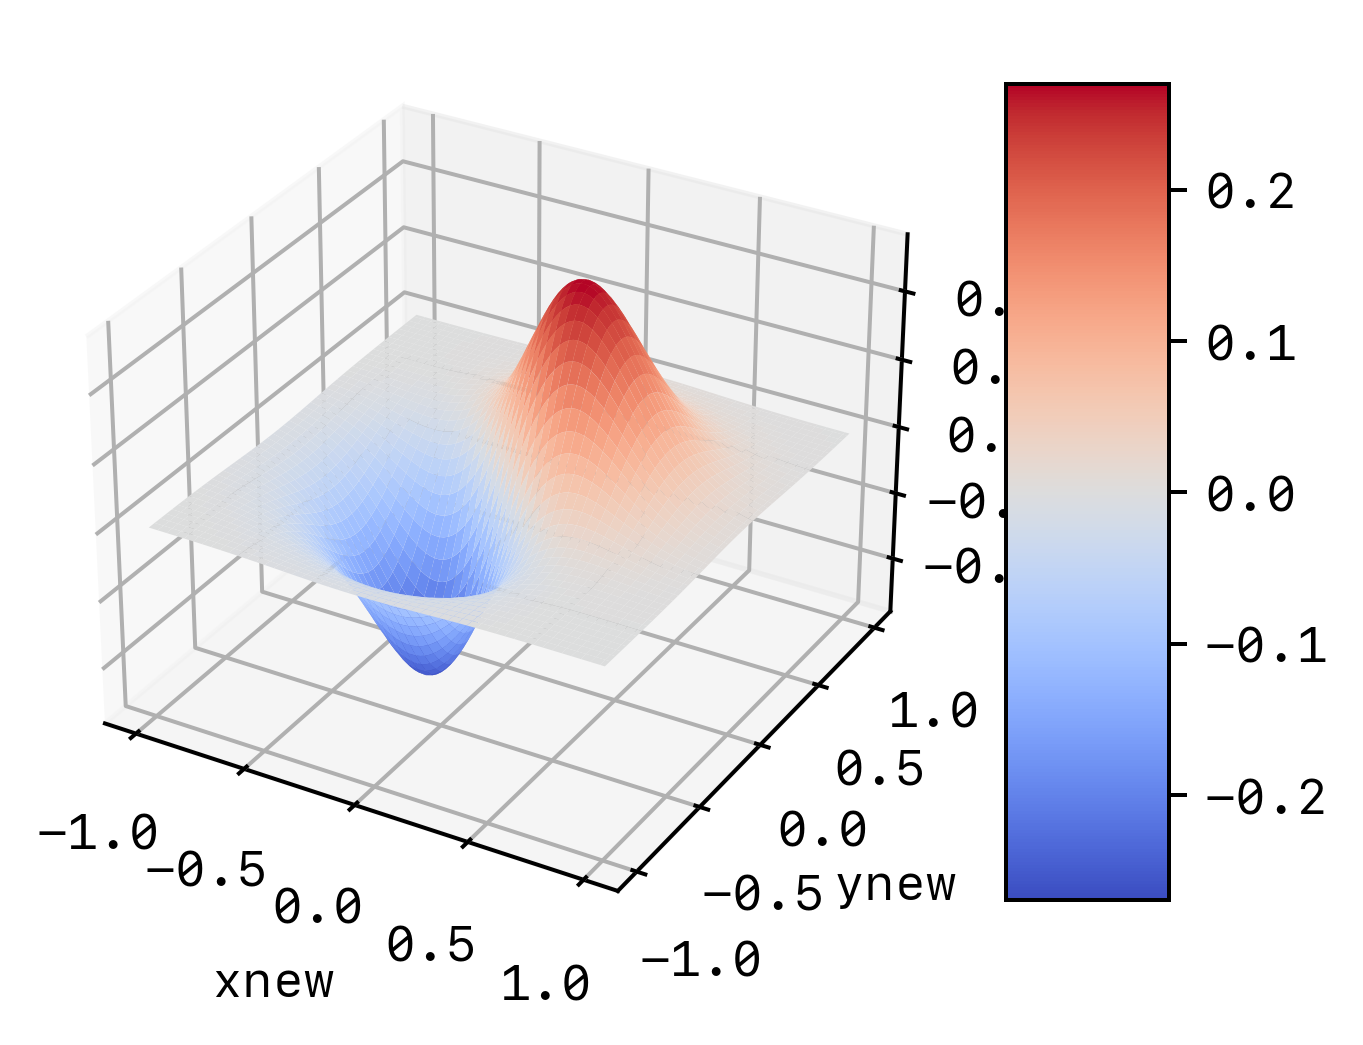

In [21]:
#二维插值
fig = plt.figure(figsize=(9, 6))
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')
#计算100*100网格上插值
xnew = np.linspace(-1, 1, 100)
ynew = np.linspace(-1, 1, 100)
fnew = newfunc(xnew, ynew)
xnew, ynew = np.meshgrid(xnew, ynew)
ax2 = plt.subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(x,y)')
plt.colorbar(surf2, shrink=0.5, aspect=5)  #标注
plt.show()

## 最小二乘法

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  font

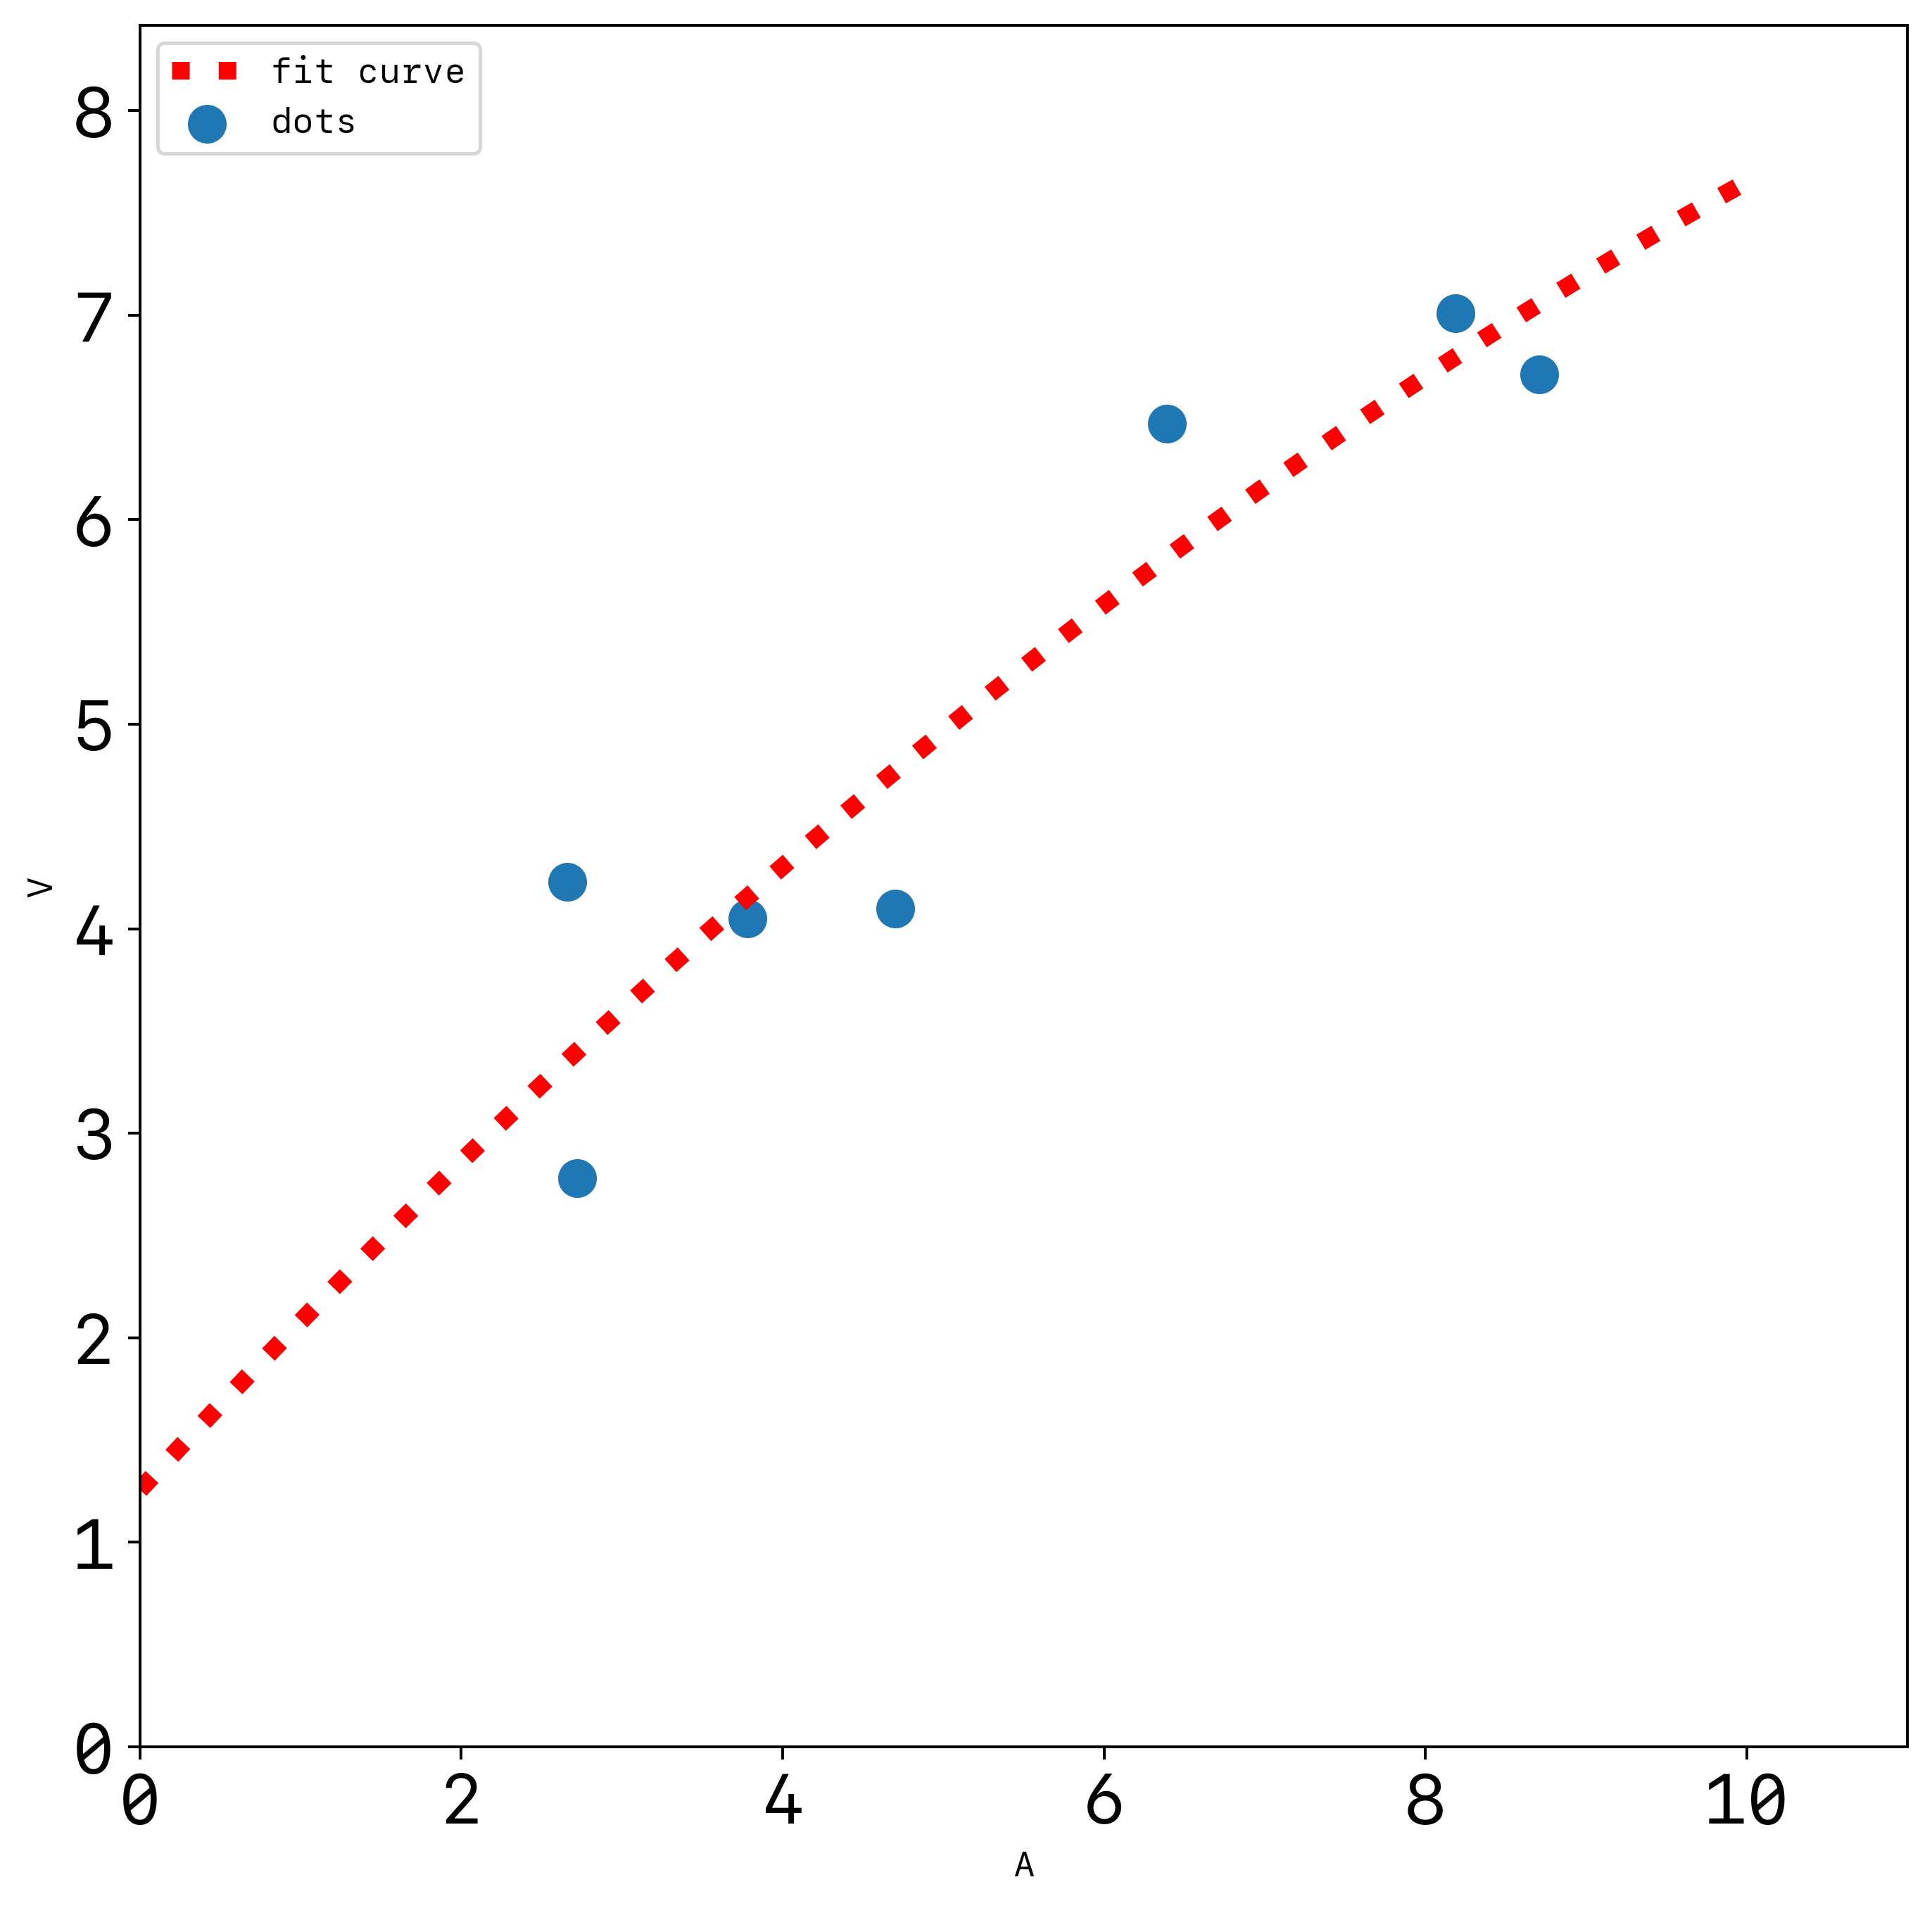

In [22]:
plt.figure(figsize=(9, 9))
X = np.array([8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
Y = np.array([7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])


# 计算以p为参数的直线与原始数据之间误差
# 二次函数
def f(p):
    a, b, c = p
    return Y - (a * X * X + b * X + c)


#leastsq使得f的输出数组的平方和最小，参数初始值为[1,0]
r = optimize.leastsq(f, [1, 0, 0])
a, b, c = r[0]
plt.scatter(X, Y, s=100, alpha=1.0, marker='o', label=u'dots')
x = np.linspace(0, 10, 1000)
y = a * x * x + b * x + c
plt.plot(x, y, color='r', linewidth=5, linestyle=":", markersize=20, label=u'fit curve')
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext)
plt.xlabel(u'A')
plt.ylabel(u'V')
plt.xlim(0, x.max() * 1.1)
plt.ylim(0, y.max() * 1.1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left')
plt.show()